In [71]:
import matplotlib.pyplot as plt;
import seaborn as sns;
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline  
import numpy as np;

## Image Ingest

In [72]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [84]:
#im = Image.open("Data/Mar19_Manual_Run_2/29 A-549 PA cc 03.tif",mode='r')
#im = Image.open("Data/Mar19_Manual_Run_2/P aeru 18hr CoCulture 2.tif",mode='r');
im = Image.open("Data/Mar19_Manual_Run_2/No bacteria 18hr A549 3.tif",mode='r');
#im = Image.open("Data/Mar19_Manual_Run_2/P aeru 8 hr Coculture 3.tif",mode='r');
#im = Image.open("Data/Mar19_Manual_Run_2/00 A-549 PA cc 03.tif",mode='r');
#im = Image.open("Data/Mar19_Manual_Run_2/06 A549 PA cc 03.tif",mode='r');
#im = Image.open("Data/Mar19_Manual_Run_2/P aeru 12hr Coculture 1.tif",mode='r');# A549 PA cc 03.tif",mode='r');
#im = Image.open("Data/Mar19_Manual_Run_2/P aeru 10hr Coculture 3.tif",mode='r');
#im = Image.open("Data/Mar19_Manual_Run_2/P aeru 14hr A549 3.tif",mode='r');
#im = Image.open("Data/Mar19_Manual_Run_2/P aeru 18hr CoCulture 2.tif",mode="r");
#im = Image.open("Data/Mar19_Manual_Run_2/29 A-549 PA cc 03.tif",mode="r");


#im = Image.open("Data/Mar19_Manual_Run_2/SA/00 A-549 SA cc 02.tif");
#im = Image.open("Data/Mar19_Manual_Run_2/SA/04 A549 SA cc 02.tif");
#im = Image.open("Data/Mar19_Manual_Run_2/SA/06 A549 SA cc 02.tif");
#im = Image.open("Data/Mar19_Manual_Run_2/SA/S aure 8hr A549 2.tif");
#im = Image.open("Data/Mar19_Manual_Run_2/SA/S aeru 10hr CoCulture 2.tif");
#im = Image.open("Data/Mar19_Manual_Run_2/SA/S areu 12hr CoCulture 2.tif");
#im = Image.open("Data/Mar19_Manual_Run_2/SA/S areu 14hr CoCulture 2.tif");
#im = Image.open("Data/Mar19_Manual_Run_2/SA/S aure 18hr CoCulture 2.tif");
#im = Image.open("Data/Mar19_Manual_Run_2/SA/29 A-549 SA cc 02.tif");




#imshow(np.asarray(im))
im_array = np.asarray(im,dtype=np.float32)
im_array_gray = rgb2gray(im_array);

In [85]:
from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
#image = img_as_float(data.coins())
image = gaussian_filter(im_array_gray, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')
im_array_gray = image;

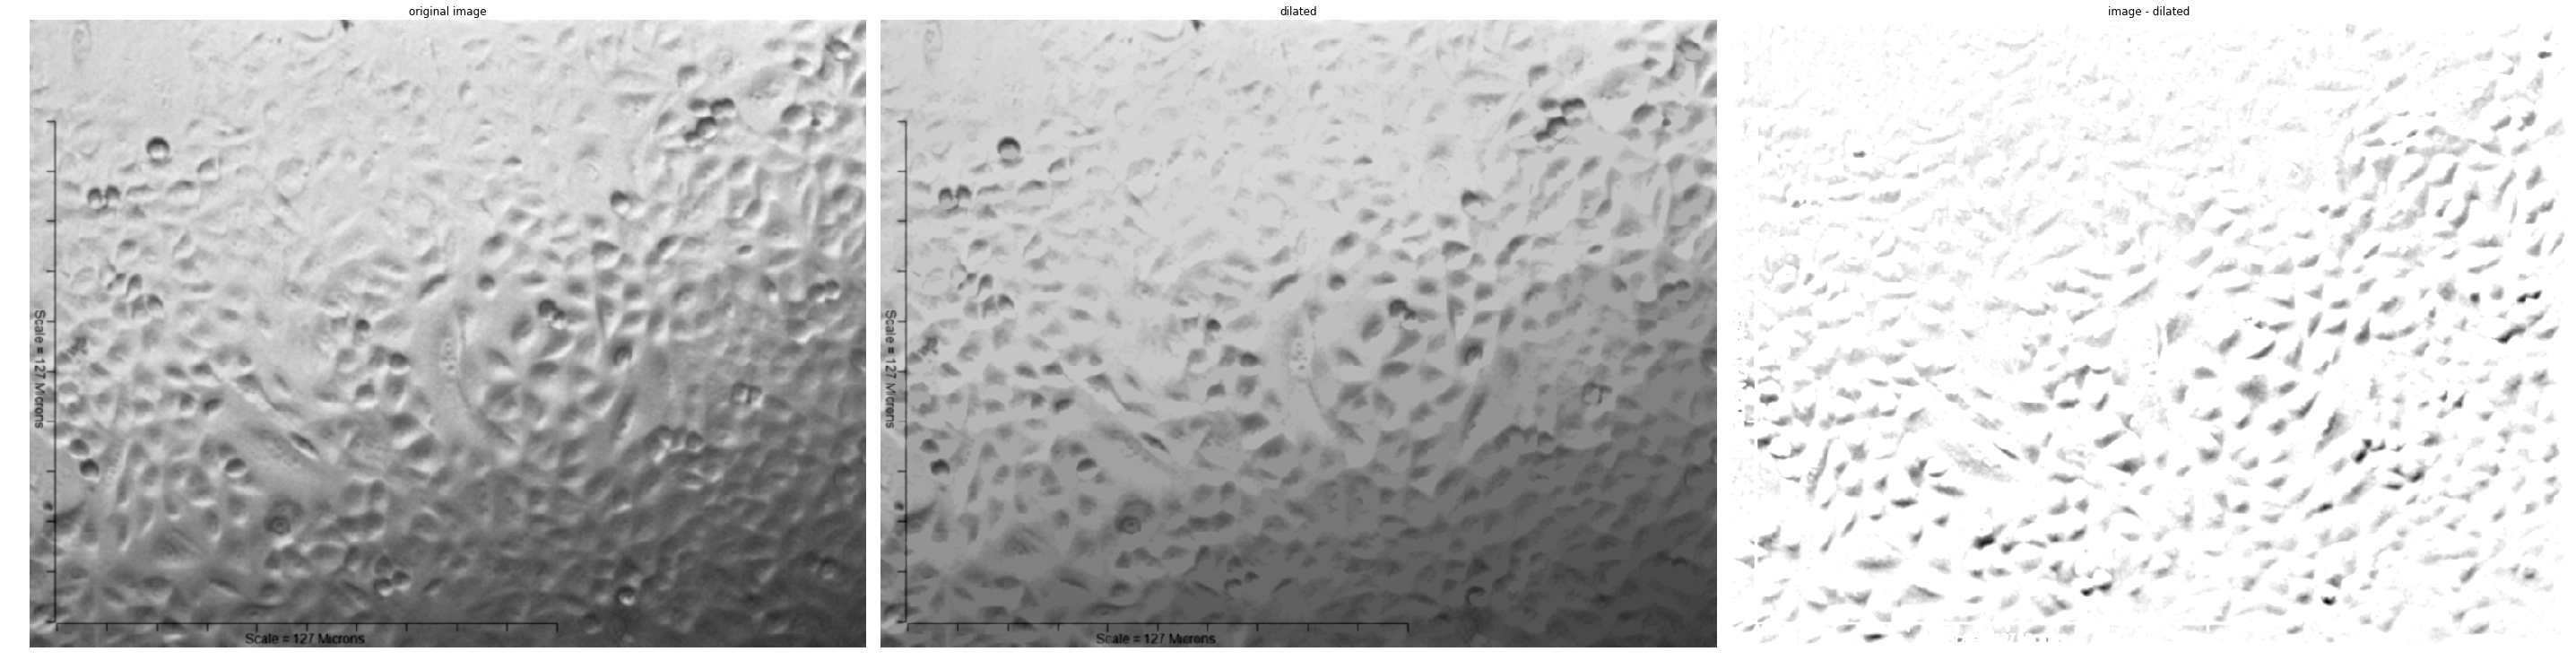

In [86]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(40, 10.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow((dilated-image), cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

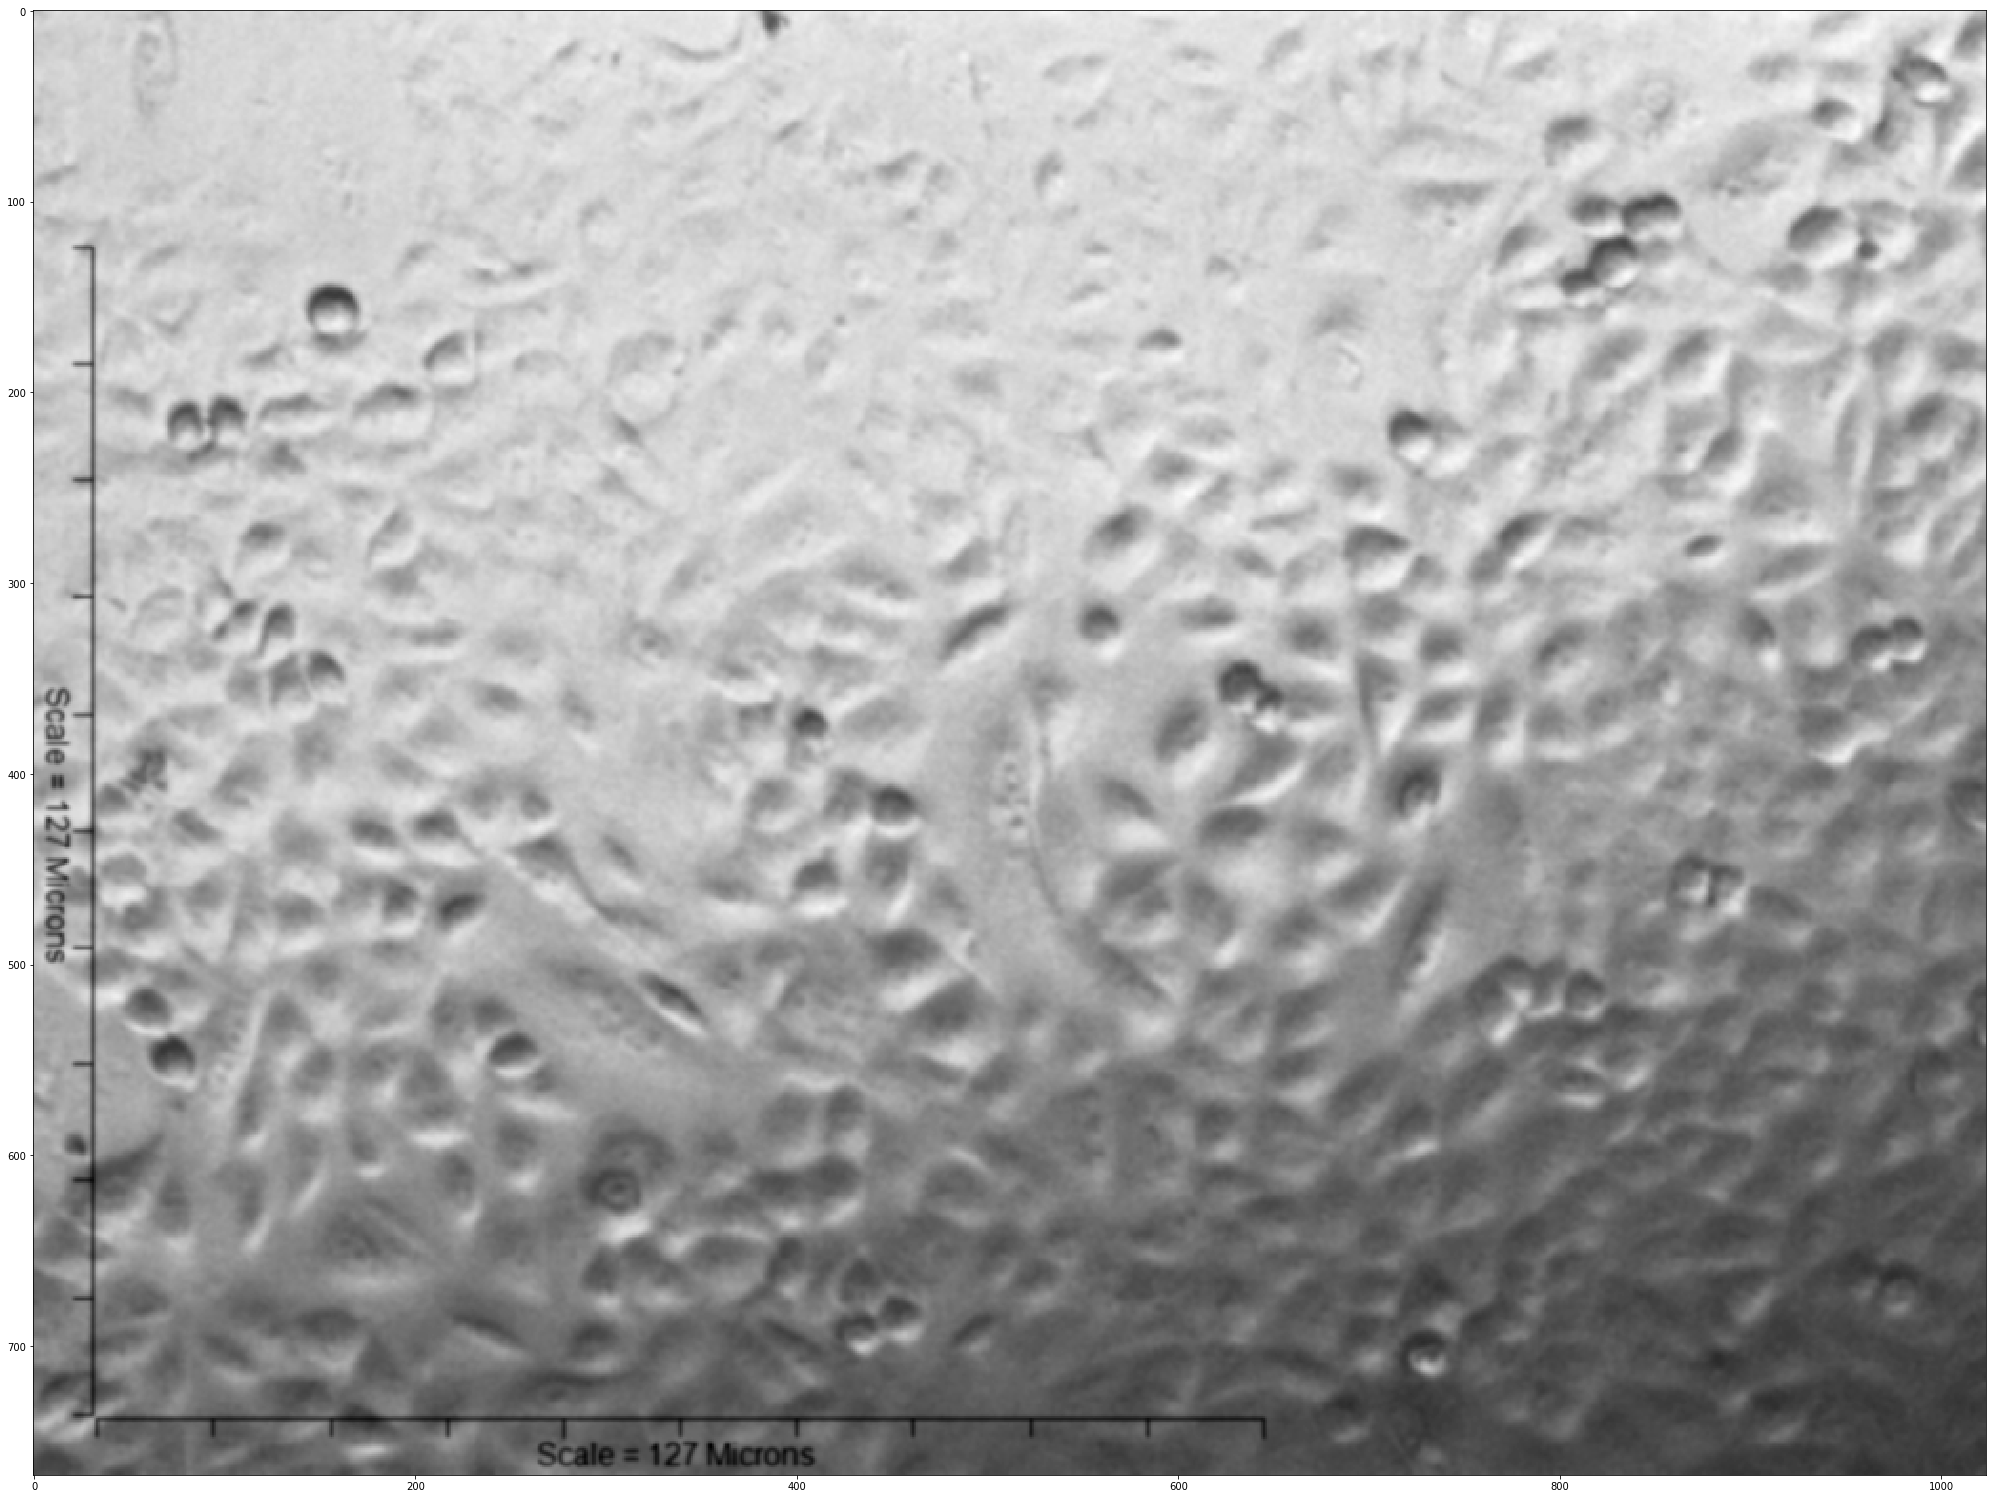

In [87]:
plt.figure(figsize=[35,35])
imshow(im_array_gray,cmap='gray')

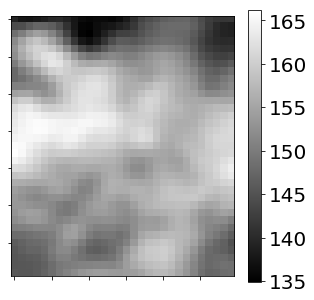

In [88]:
plt.figure(figsize=[5,5])
imshow(np.abs(1.0-im_array_gray[335:370,320:350]),cmap='gray')
ax = plt.gca()
ax.set_xticklabels({})
ax.set_yticklabels({})
#plt.setp(plt.gca().get_xticklabels(), rotation='horizontal', fontsize=40)
#plt.setp(plt.gca().get_yticklabels(), rotation='horizontal', fontsize=40)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=20) 
Im_array_gray_inverse = np.abs(1.0-im_array_gray);

## Kernel Definition & Extraction


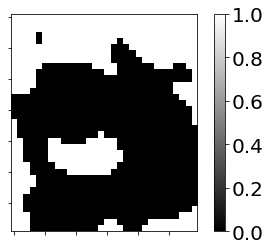

In [89]:
#sample_kernel = np.array(im_array_gray[335:370,320:350])

plt.hist(sample_kernel.flatten(),bins=40)
np.percentile(sample_kernel.flatten(),63)

#sample_kernel = np.array(im_array_gray[335:370,320:350])
mask_sample_kernel = sample_kernel-sample_kernel;
for row_ind in range(0,sample_kernel.shape[0]):
    for col_ind in range(0,sample_kernel.shape[1]):
        x = sample_kernel[row_ind][col_ind];
        mask_sample_kernel[row_ind][col_ind] = x>105.00;

Mask_sample_kernel_inverse = np.abs(1.0-mask_sample_kernel);
Im_array_gray_inverse = np.abs(1.0-im_array_gray);

imshow(np.abs(1.0-Mask_sample_kernel_inverse),cmap='gray')
cbar = plt.colorbar()
ax = plt.gca()
ax.set_xticklabels({})
ax.set_yticklabels({})
cbar.ax.tick_params(labelsize=20) 

### Feature Extraction

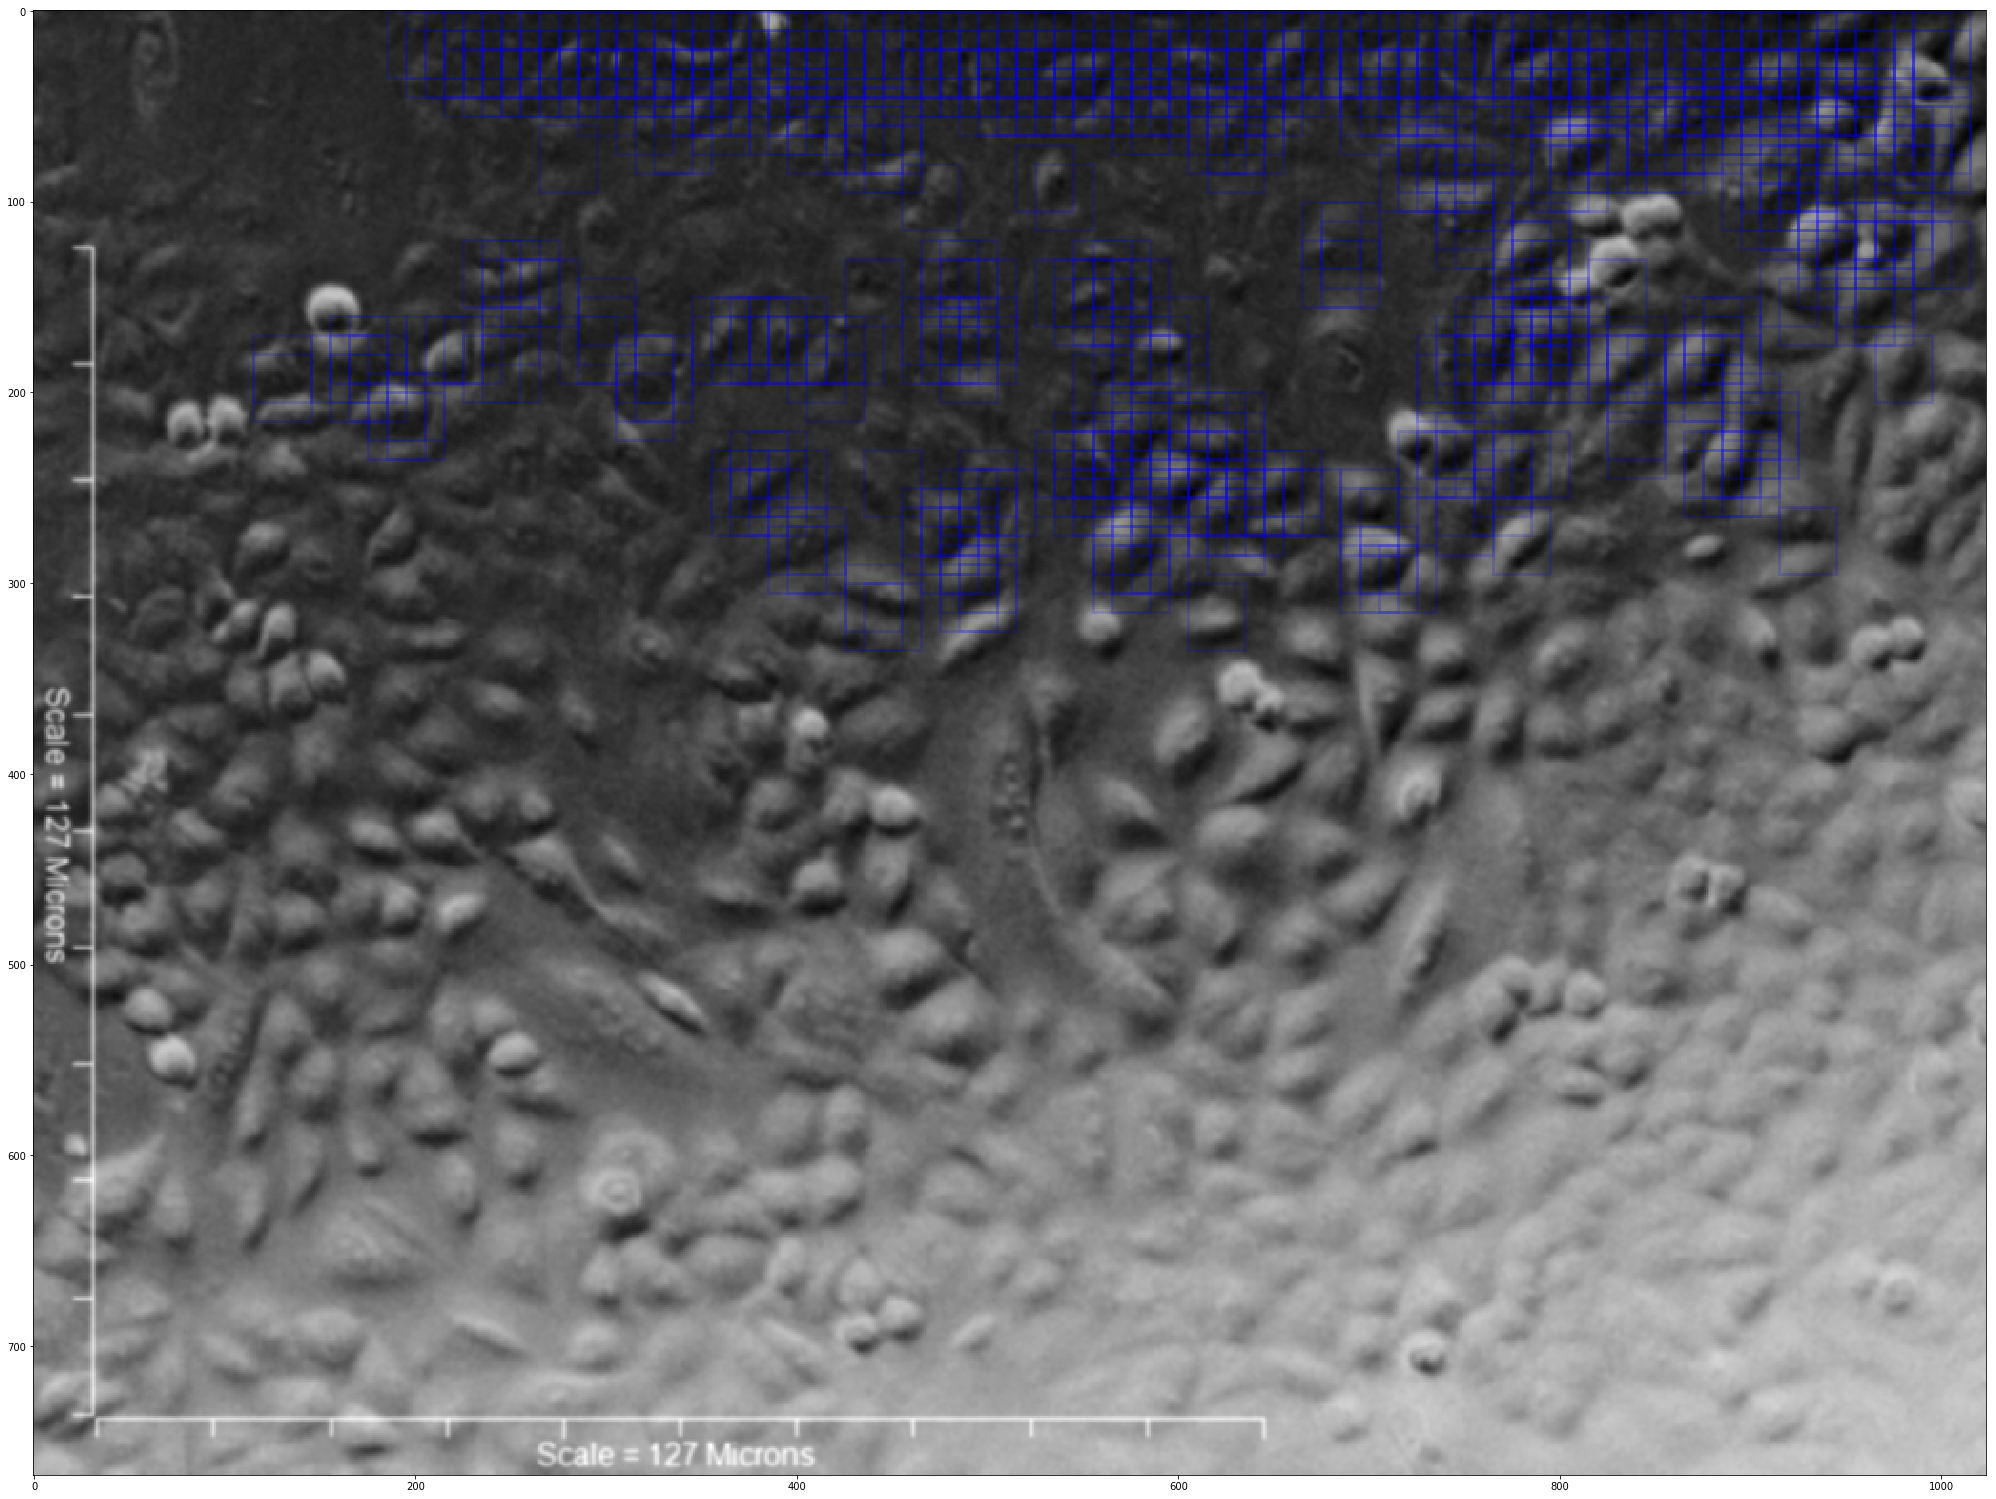

In [91]:
im_array_gray = 255.0*np.abs(1.0-im_array_gray/256.0);

num_rows = Im_array_gray_inverse.shape[0];
num_cols = Im_array_gray_inverse.shape[1];
mask_rows = Mask_sample_kernel_inverse.shape[0]
mask_cols = Mask_sample_kernel_inverse.shape[1];
import matplotlib.patches as patches

BFGate = np.percentile(im_array_gray.flatten(),5);  #5% usually is most permissive 
all_norms = [];
all_rects = [];
Raw_Subimage_Count = 0;
for row_ind in np.arange(0,num_rows-mask_rows,10):
    for col_ind in np.arange(35,num_cols-mask_cols,10):
        Raw_Subimage = np.array(im_array_gray[row_ind:row_ind+mask_rows,col_ind:col_ind+mask_cols]);
        
        Raw_Subimage_Gated = Raw_Subimage - Raw_Subimage;
        Raw_Subimage_Gated[Raw_Subimage>BFGate]=1.0;    
        Raw_Subimage_Gated[Raw_Subimage<=BFGate]=0.0;  #this is a magic number - perhaps there is a better way we can tune parameters here. 
        Raw_Subimage_Gated_Inverse = np.abs(1.0-Raw_Subimage_Gated);
        temp_filtered_image = np.multiply(Raw_Subimage_Gated_Inverse,Mask_sample_kernel_inverse);
        this_norm= np.linalg.norm(temp_filtered_image,'fro');
        #this_norm = np.linalg.norm(Raw_Subimage_Gated_Inverse,'fro')
        all_norms.append(this_norm);
        
        if 10.0 <this_norm:                       

            
            this_rect = patches.Rectangle((col_ind,row_ind),mask_cols,mask_rows,linewidth=3,edgecolor='b',facecolor='none',alpha=0.15);
            all_rects.append(this_rect);
            #plt.savefig('/Users/yeun666/Documents/FoFProcessedImages/Movies/Mar19/SubImage_' + repr(Raw_Subimage_Count) + '.jpg',dpi=500,format='jpeg')
            
            Raw_Subimage_Count +=1; 
        
plt.figure(figsize=(35,35));        
imshow(im_array_gray,cmap='gray')
ax = plt.gca();
for rect in all_rects:
    ax.add_patch(rect)
plt.show()
            


Text(0.5,0,'Frobenius Norm of Convolution w/ P-Feature ')

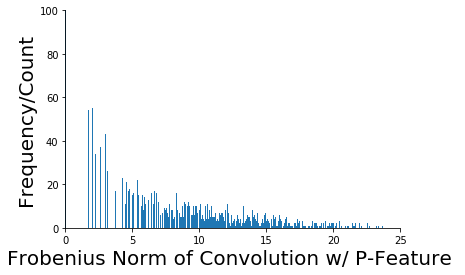

In [80]:
plt.hist(all_norms,bins=500);

plt.xlim([0.0,25.0])
plt.ylim([0.0,1e2])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.ylabel('Frequency/Count',size=20)
plt.xlabel('Frobenius Norm of Convolution w/ P-Feature ',size=20)

In [44]:
all_norms

[1.4142135,
 2.236068,
 1.0,
 0.0,
 5.5677643,
 12.0,
 15.427249,
 15.362291,
 11.18034,
 7.4161983,
 0.0,
 0.0,
 3.0,
 4.7958317,
 13.674794,
 17.578396,
 15.264338,
 10.246951,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 2.6457512,
 3.8729835,
 1.7320508,
 1.7320508,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 2.4494898,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.0,
 8.0,
 14.282857,
 17.204651,
 15.165751,
 9.8994951,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.3851647,
 4.5825758,
 1.7320508,
 0.0,
 0.0,
 2.8284271,
 3.8729835,
 1.4142135,
 5.7445626,
 7.8102498,
 8.944272,
 6.244998,
 2.6457512,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 9.7467947,
 12.165525,
 11.874342,
 8.485281,
 0.0,
 0.0,
 0.0,
 0.0,
 3.3166249,
 10.099504,
 17.0,
 20.952328,
 19.209373,
 20.420578,
 21.330729,
 22.95648,
 24.04163,
 25.21904,
 23.622025,
 20.124611,
 14.933185,
 13.038404,
 10.770329,
 5.0990195,
 0.0,
 0.0